In [1]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt 

# 加载数据集（首次运行会自动下载约70MB数据）
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

# 查看数据维度
print("样本数量:", X.shape[0])  # 70000个样本
print("特征维度:", X.shape[1])  # 每个数字是28x28=784像素

# 归一化处理（将像素值从0-255缩放到0-1）
X = X / 255.0
 
# 分割训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000, random_state=42)


样本数量: 70000
特征维度: 784


In [2]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.optim as optim

# 转换为PyTorch Tensors并重塑以适应CNN
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).reshape(-1, 1, 28, 28)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# 创建数据集
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

In [3]:
# 创建数据加载器
batch_size = 128
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

# 定义CNN模型
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, kernel_size=5, stride=1, padding=2)
        self.relu1 = nn.ReLU()
        self.pool1 = nn.MaxPool2d(kernel_size=2)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=5, stride=1, padding=2)
        self.relu2 = nn.ReLU()
        self.pool2 = nn.MaxPool2d(kernel_size=2)
        self.fc = nn.Linear(32 * 7 * 7, 10)

    def forward(self, x):
        out = self.pool1(self.relu1(self.conv1(x)))
        out = self.pool2(self.relu2(self.conv2(out)))
        out = out.view(out.size(0), -1)
        out = self.fc(out)
        return out

# 实例化模型、损失函数和优化器
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 5
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # 前向传播
        outputs = model(images)
        loss = criterion(outputs, labels)
        
        # 反向传播和优化
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if (i+1) % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


Epoch [1/5], Step [100/469], Loss: 0.2947
Epoch [1/5], Step [200/469], Loss: 0.2596
Epoch [1/5], Step [300/469], Loss: 0.1182
Epoch [1/5], Step [400/469], Loss: 0.0471
Epoch [2/5], Step [100/469], Loss: 0.0764
Epoch [2/5], Step [200/469], Loss: 0.0595
Epoch [2/5], Step [300/469], Loss: 0.0404
Epoch [2/5], Step [400/469], Loss: 0.0537
Epoch [3/5], Step [100/469], Loss: 0.0585
Epoch [3/5], Step [200/469], Loss: 0.0539
Epoch [3/5], Step [300/469], Loss: 0.0063
Epoch [3/5], Step [400/469], Loss: 0.0207
Epoch [4/5], Step [100/469], Loss: 0.0112
Epoch [4/5], Step [200/469], Loss: 0.0289
Epoch [4/5], Step [300/469], Loss: 0.0472
Epoch [4/5], Step [400/469], Loss: 0.0116
Epoch [5/5], Step [100/469], Loss: 0.0338
Epoch [5/5], Step [200/469], Loss: 0.0078
Epoch [5/5], Step [300/469], Loss: 0.0204
Epoch [5/5], Step [400/469], Loss: 0.0269


In [4]:
model.eval()
with torch.no_grad():
    images, labels = test_dataset.tensors
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

KNN准确率: 0.9862


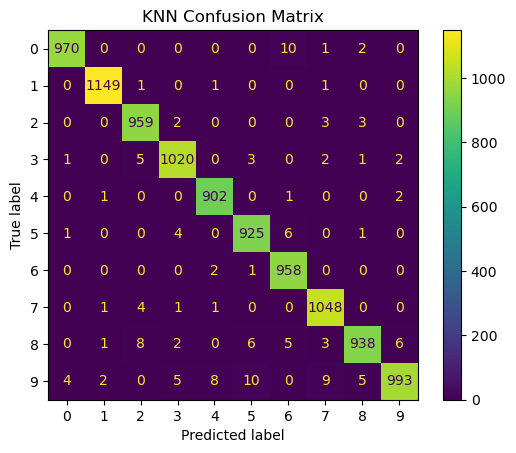

In [5]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
# 计算准确率
accuracy = accuracy_score(labels, predicted)
print(f"KNN准确率: {accuracy:.4f}")
 
# 可视化混淆矩阵
ConfusionMatrixDisplay.from_predictions(labels, predicted)
plt.title("KNN Confusion Matrix")
plt.show()